In [42]:
#1. Learning curves

# Learning Curves

To determine the bias-variance tradeoff we will use learning curves to visualize it.

The outcome of this test is to short list the most promising models

Following considerations are taken to plot the curves:

1. Plot test scores for both training and testing data
2. Cross validation with 5 folds
3. utilize sklearn's learning_curve
4. Evaluation metric is set as accuracy
5. with 10 different sizes of the training set 

This notebook contains learning curves for training set with 70 features.

In the report similar charts are presented after running this on the balanced training set and 40 shortlisted features

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Import training data 
train = pd.read_csv('../final_data/F70_train.csv')

n=70

In [45]:
train.iloc[:,0:n].shape

(47504, 70)

In [46]:
train.iloc[:,n].value_counts()


8    15591
6     8986
7     6421
2     5242
1     4966
5     4346
4     1142
3      810
Name: Response, dtype: int64

In [47]:
features = list(train.columns)[:-1]

X = train[features]
y = train[['Response']]

In [48]:
from sklearn.preprocessing import scale
x_scaled = scale(X)

In [49]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Import  classifiers
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

# label_binarize to make multi-label like settings
from sklearn.preprocessing import label_binarize

# OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import StratifiedKFold

from scipy import interp
from itertools import cycle
from inspect import signature


In [50]:
# REF: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

from sklearn.model_selection import learning_curve

In [51]:
random_state = 1234

In [52]:
x_scaled.shape
y.values.ravel().shape

(47504,)

In [53]:
# Instantiate the classfiers and make a list.

classifiers = [ GaussianNB(),              
               KNeighborsClassifier(n_neighbors=8,weights='distance',p=2),                
               DecisionTreeClassifier(random_state=random_state),                
               RandomForestClassifier(class_weight = 'balanced',random_state=random_state),
               svm.SVC(C=1.0, verbose=True,random_state=random_state),
               LogisticRegressionCV(class_weight='balanced', solver = 'lbfgs', 
                                    multi_class = 'multinomial',random_state=random_state) 
]


classifier: GaussianNB


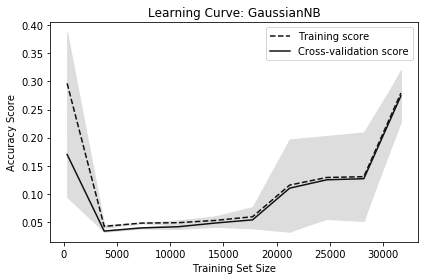

classifier: KNeighborsClassifier


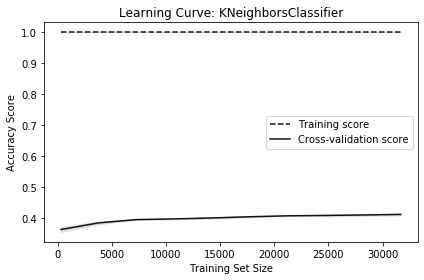

classifier: DecisionTreeClassifier


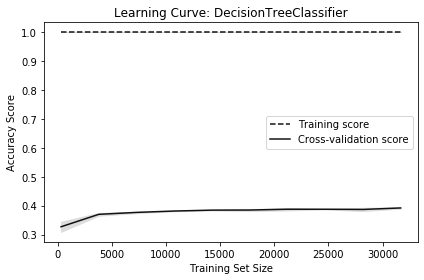

classifier: RandomForestClassifier


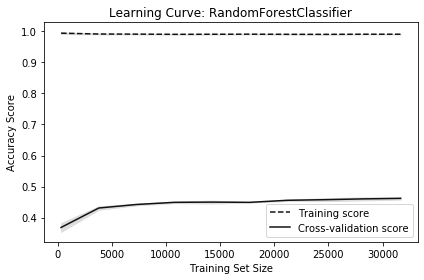

classifier: SVC


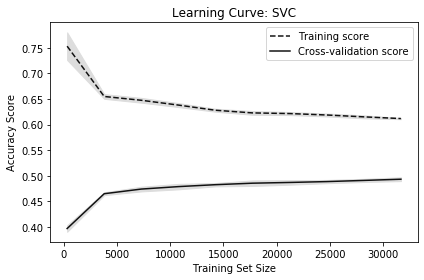

classifier: LogisticRegressionCV


In [ ]:
%%time

#for each classifier
for cls in classifiers:
    plt.figure()
    print("classifier:",cls.__class__.__name__)
    title = "Learning Curves ({})".format(cls.__class__.__name__)
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(cls,x_scaled, y.values.ravel(),
                                                            cv = StratifiedKFold(3),
                                                            scoring='accuracy',
                                                            n_jobs=3,
                                                            train_sizes=np.linspace(0.01, 1.0, 10),
                                                           shuffle=True)

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.title(title)    

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve: "+cls.__class__.__name__)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

#REF: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_learning_curve/

classifier: LogisticRegressionCV


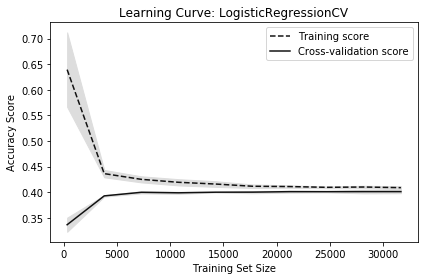

In [59]:
#the logistic regression cv was run manually to produce the graph below. I had accidently interrupted the kernel in a parallel notebook

In [60]:
print("Done")

Done
